In [2]:
%pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from party_codes import party_codes

# Load CSV into DataFrame
file_path = "data_aging_congress.csv"
df = pd.read_csv(file_path)

# Check which party codes need to be mapped
unique_party_codes = df['party_code'].unique()
print("All unique party codes:", unique_party_codes)

Note: you may need to restart the kernel to use updated packages.
{100: 'Democratic Party', 200: 'Republican Party', 1: 'Federalist Party', 13: 'Democratic-Republican Party', 22: 'Adams Party', 26: 'Anti Masonic Party', 29: 'Whig Party', 37: 'Constitutional Unionist Party', 44: 'Nullifier Party', 46: 'States Rights Party', 108: 'Anti-Lecompton Democrats', 112: 'Conservative Party', 114: 'Readjuster Party', 117: 'Readjuster Democrats', 203: 'Unconditional Unionist Party', 206: 'Unionist Party', 208: 'Liberal Republican Party', 213: 'Progressive Republican Party', 300: 'Free Soil Party', 310: 'American Party', 326: 'National Greenbacker Party', 340: 'Populist PARTY', 347: 'Prohibitionist Party', 354: 'Silver Republican Party', 355: 'Union Labor Party', 356: 'Union Labor Party', 370: 'Progressive Party', 380: 'Socialist Party', 402: 'Liberal Party', 403: 'Law and Order Party', 522: 'American Labor Party', 523: 'American Labor Party (La Guardia)', 537: 'Farmer-Labor Party', 555: 'Jackson P

In [4]:
# Map party codes to display party name
def get_party_name(code):
    # Use the imported party_codes dictionary
    return party_codes.get(code, "Unknown")

# Apply the function to create 'party_name' column
df['party_name'] = df['party_code'].apply(get_party_name)

# Standardize name capitalization
df['bioname'] = df['bioname'].str.title()

# Save to CSV
output_file_path = "congress_data_with_party_and_standardized_names.csv"
df.to_csv(output_file_path, index=False)


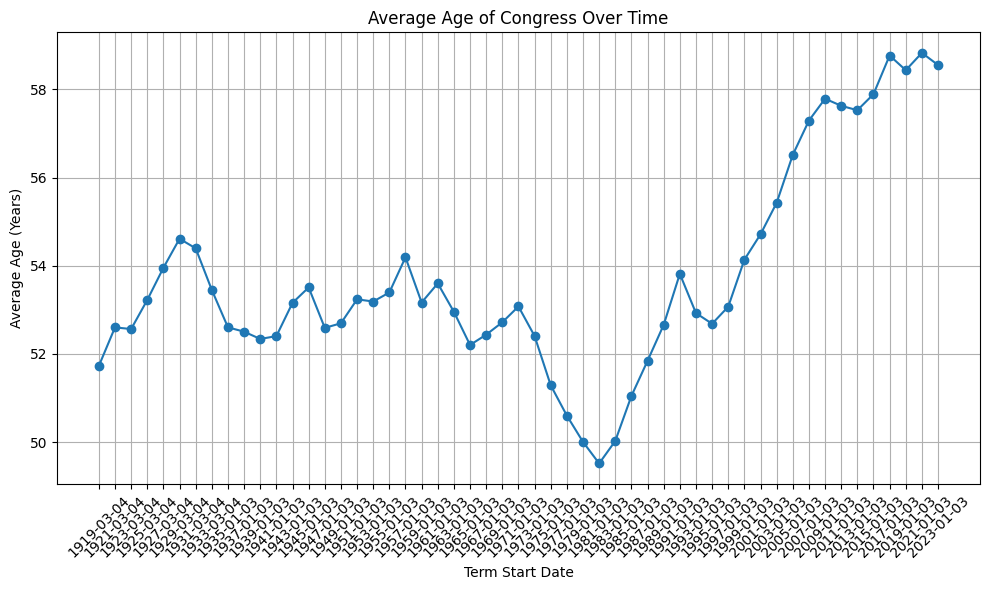

In [46]:
# Compute average age by date of term
avg_age = df.groupby('start_date').age_years.mean().reset_index()

# Plotting
plt.figure(figsize=(10,6))
plt.plot(avg_age['start_date'], avg_age['age_years'], marker='o', linestyle='-')
plt.title('Average Age of Congress Over Time')
plt.xlabel('Term Start Date')
plt.ylabel('Average Age (Years)')

# Improve date visibility by rotating label
ax = plt.gca()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()